In [69]:
import numpy as np

In [70]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

# Cubic Spline Interpolator

In [71]:
from math import floor

class Interpolator():
    
    num_terms = 27
    
    def __init__(self, n, xmin, xmax):
        
        assert ( n > self.num_terms)
        self.n      = n
        self.xmin   = xmin
        self.xmax   = xmax
        self.rdelta = (n-1) / (xmax - xmin)
        self.d      = np.zeros(n)
        self.coeffs = np.zeros(n+3)
        
    def compute_interpolants( self, f ):
        
        n = self.n
        num_terms = self.num_terms
        a=np.sqrt((2.0+np.sqrt(3.0))/6.0)
        r_a = 1.0/a
        b=np.sqrt((2.0-np.sqrt(3.0))/6.0)
        b_a = b/a

        d1 = f[0]
        coeff_tmp = 1.0
        for i in range(num_terms):
           coeff_tmp *= (-b_a)
           d1 += coeff_tmp*f[n-2-i]

        self.d[0] = d1*r_a
        for i in range(1,n-1):
            self.d[i] = r_a*(f[i] - b*self.d[i-1])
        
        d1        = self.d[-2]
        coeff_tmp = 1.0
        for i in range(num_terms):
           coeff_tmp *= (-b_a)
           d1 += coeff_tmp*self.d[i]

        self.coeffs[n-1] = d1*r_a
    
        for i in range(n-2, 0, -1):
           self.coeffs[i] = r_a*(self.d[i-1] - b*self.coeffs[i+1])

        self.coeffs[0]  = self.coeffs[-4]
        self.coeffs[-1:-4:-1] = self.coeffs[3:0:-1]
        
    def interpolate( self, x ):
        
        rh      = self.rdelta
        t0      = (x-self.xmin)*rh
        cell    = floor(t0)
        dx      = t0 - cell
        cdx     = 1.0 - dx
        cim1    = self.coeffs[cell]
        ci      = self.coeffs[cell+1]
        cip1    = self.coeffs[cell+2]
        cip2    = self.coeffs[cell+3]
        t1      = 3.0*ci
        t3      = 3.0*cip1
        t2      = cdx*(cdx*(cdx*(cim1 - t1) + t1) + t1) + ci
        t4      =  dx*( dx*( dx*(cip2 - t3) + t3) + t3) + cip1
            
        return (t2 + t4) / 6.0



## Interpolation test

In [72]:
n =1000
cs = Interpolator(n,0,1)
x = np.linspace(0,1,n)
y = np.sin(x*2*np.pi)
x_new = x.min() + np.random.random(n) * (x.max() - x.min())
x_new.sort()

In [73]:
%%timeit
cs.compute_interpolants(y)
y_new = map(cs.interpolate,x_new)

1.25 ms ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


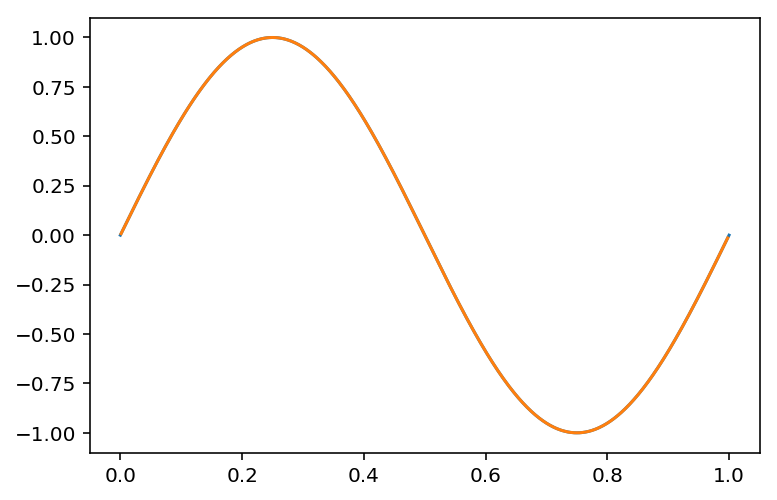

In [74]:
plt.plot(x, y,  x_new, [cs.interpolate(e) for e in x_new]);

# Vlasov-Poisson equation

$$
\frac{\partial f}{\partial t}+ v\cdot \nabla_x f + E(t,x) \cdot \nabla_v f =0,
$$
$$
\rho(t,x) = \int f(t,x,v)dv,
$$
$$
E(t,x) = \int \rho(t,x,v)dx  - \bar{\rho},
$$





In [76]:
class Vlasov:
    
    def __init__(self, xmin, xmax, nx, vmin, vmax, nv, f = None):
        
        self.nx = nx
        self.x, self.dx = np.linspace(xmin, xmax, nx, endpoint=False, retstep=True )
        self.nv = nv
        self.v, self.dv = np.linspace(vmin, vmax, nv, endpoint=False, retstep=True)

        if f is not None : self.f = f
        self.cs_x = Interpolator(x.size, xmin, xmax)
        self.cs_y = Interpolator(v.size, vmin, vmax)
        self.modes = 2 * np.pi * (np.arange(nx / 2 + 1)) / (xmax - xmin)
        self.modes[0] = 1.  # avoid division by 0

    def advection_x(self, dt):
        for j in range(self.nv):
            self.cs_x.compute_interpolants(self.f[:,j])
            v_new = - dt * self.v
            self.f[:,j] = [self.cs_x.interpolate(e) for e in x_new]

    def advection_v(self, dt):
        for i in range(self.nx):
            self.cs_v.compute_interpolants(self.f[i,:])
            v_new = - dt*ex(i) * self.x
            self.f[i,:] = [self.cs_v.interpolate(e) for e in v_new]
            
    def compute_rho(self):
        return  self.dv * np.sum(f, axis=0)
            
    def compute_e(self, rho):
        # compute Ex using that ik*Ex = rho
        rhok = np.fft.rfft(rho)
        return np.fft.irfft(-1j*rhok/modes)

# Landau Damping

In [79]:

sim = Vlasov(xmin = 0.0, xmax = 4*np.pi, nx = 100,
             vmin = -6., vmax = 6., nv = 100)

X, V = np.meshgrid(sim.x, sim.v)
eps = 0.05
kx  = 0.5 
sim.f = (1.0+eps*np.cos(kx*X))/(2.0*np.pi)* np.exp(-0.5*V*V)

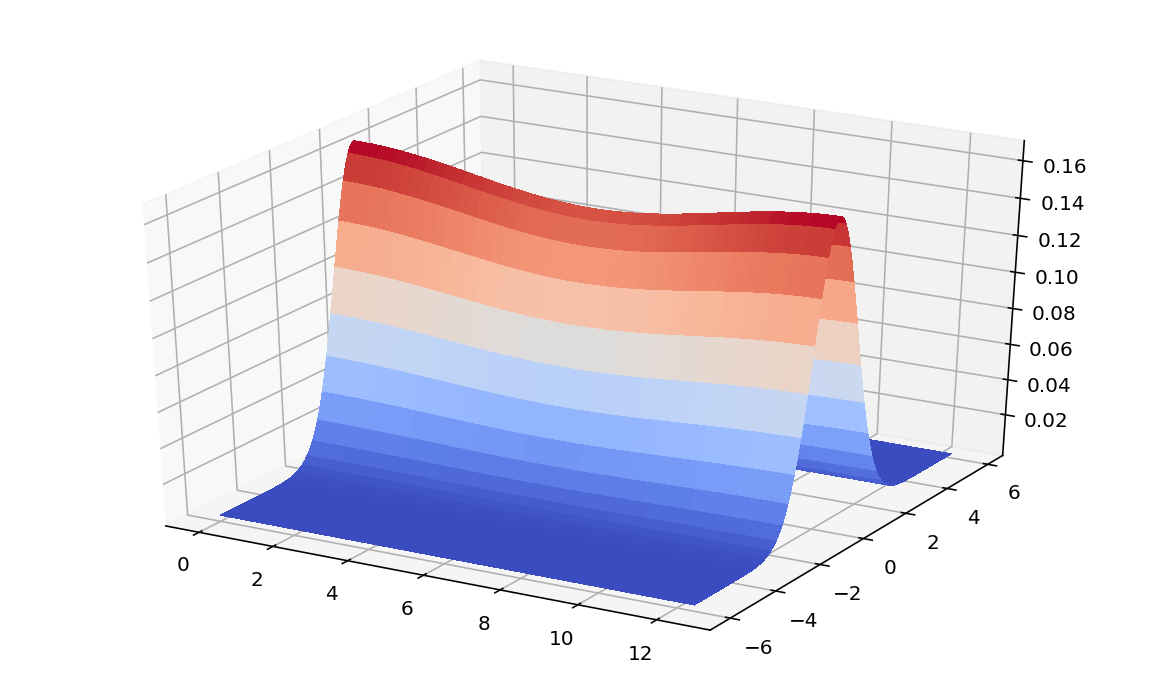

In [81]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (10.0, 6.0)
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, V, sim.f, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


In [64]:
dt = 0.05

sim.advection_x(0.5*dt)

nrj = []

for istep in range(nstep)
    rho = sim.compute_rho()
    e = sim.compute_e(rho)
    sim.advection_v(dt)
    sim.advection_x(dt)
    nrj.append( 0.5*np.log(np.sum(ex*ex)*dx))
    time = time + dt


SyntaxError: invalid syntax (<ipython-input-64-1e1b2c9b5da7>, line 8)